### Import libraries 

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read and explore data

In [21]:
df = pd.read_csv("commerce.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


<AxesSubplot:>

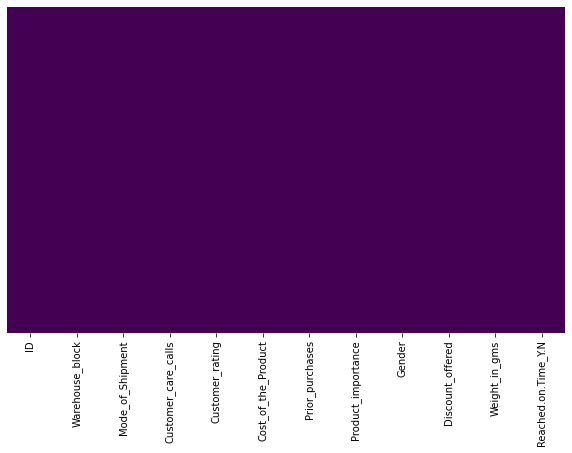

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [23]:
df.Warehouse_block.value_counts()

F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64

In [24]:
df.Mode_of_Shipment.value_counts()

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

In [25]:
df.Product_importance.value_counts()

low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

### Processing data

Creating dummy variables

In [26]:
warehouse = pd.get_dummies(df['Warehouse_block'])
shipment = pd.get_dummies(df["Mode_of_Shipment"])
importance = pd.get_dummies(df["Product_importance"])
sex = pd.get_dummies(df["Gender"])

In [27]:
df.drop(["Warehouse_block", "Mode_of_Shipment", "Product_importance", "Gender"],axis=1,inplace=True)

In [28]:
df.columns

Index(['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [29]:
df = pd.concat([warehouse, shipment, importance, sex, df],axis=1)
df.drop(["ID", "F", "Ship", "medium", "F"],axis=1,inplace=True)
df.head()

,A,B,C,D,Flight,Road,high,low,M,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,0,0,0,1,1,0,0,1,0,4,2,177,3,44,1233,1
1,0,0,0,0,1,0,0,1,1,4,5,216,2,59,3088,1
2,1,0,0,0,1,0,0,1,1,2,2,183,4,48,3374,1
3,0,1,0,0,1,0,0,0,1,3,3,176,4,10,1177,1
4,0,0,1,0,1,0,0,0,0,2,2,184,3,46,2484,1


In [35]:
df = df.rename(columns={"M": "sex", "high": "importance_high", "low": "importance_low", 
                       "Flight": "shipment_flight", "Road": "shipment_road", 
                       "A": "warehouse_A", "B": "warehouse_B","C": "warehouse_C","D": "warehouse_D", 
                       "Reached.on.Time_Y.N": "OnTime"})

In [36]:
df.head()

,warehouse_A,warehouse_B,warehouse_C,warehouse_D,shipment_flight,shipment_road,importance_high,importance_low,sex,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,OnTime
0,0,0,0,1,1,0,0,1,0,4,2,177,3,44,1233,1
1,0,0,0,0,1,0,0,1,1,4,5,216,2,59,3088,1
2,1,0,0,0,1,0,0,1,1,2,2,183,4,48,3374,1
3,0,1,0,0,1,0,0,0,1,3,3,176,4,10,1177,1
4,0,0,1,0,1,0,0,0,0,2,2,184,3,46,2484,1
